In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('hotel_booking.csv')
pd.set_option('display.max_columns',None)
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


## create dataframe of useful columns.

In [14]:
data = data[['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 
              'arrival_date_day_of_month', 'stays_in_weekend_nights', 
             'stays_in_week_nights', 'adults', 'country', 'market_segment', 'distribution_channel', 
             'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'days_in_waiting_list', 
             'reservation_status_date']]
data.head(10)

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,days_in_waiting_list,reservation_status_date
0,Resort Hotel,0,2015,July,1,0,0,2,PRT,Direct,Direct,0,C,C,0,2015-07-01
1,Resort Hotel,0,2015,July,1,0,0,2,PRT,Direct,Direct,0,C,C,0,2015-07-01
2,Resort Hotel,0,2015,July,1,0,1,1,GBR,Direct,Direct,0,A,C,0,2015-07-02
3,Resort Hotel,0,2015,July,1,0,1,1,GBR,Corporate,Corporate,0,A,A,0,2015-07-02
4,Resort Hotel,0,2015,July,1,0,2,2,GBR,Online TA,TA/TO,0,A,A,0,2015-07-03
5,Resort Hotel,0,2015,July,1,0,2,2,GBR,Online TA,TA/TO,0,A,A,0,2015-07-03
6,Resort Hotel,0,2015,July,1,0,2,2,PRT,Direct,Direct,0,C,C,0,2015-07-03
7,Resort Hotel,0,2015,July,1,0,2,2,PRT,Direct,Direct,0,C,C,0,2015-07-03
8,Resort Hotel,1,2015,July,1,0,3,2,PRT,Online TA,TA/TO,0,A,A,0,2015-05-06
9,Resort Hotel,1,2015,July,1,0,3,2,PRT,Offline TA/TO,TA/TO,0,D,D,0,2015-04-22


## Fetching day from reservation_status_date column

In [6]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['reservation_status_day'] = data['reservation_status_date'].dt.day_name()

In [15]:
data.head(10)

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,days_in_waiting_list,reservation_status_date
0,Resort Hotel,0,2015,July,1,0,0,2,PRT,Direct,Direct,0,C,C,0,2015-07-01
1,Resort Hotel,0,2015,July,1,0,0,2,PRT,Direct,Direct,0,C,C,0,2015-07-01
2,Resort Hotel,0,2015,July,1,0,1,1,GBR,Direct,Direct,0,A,C,0,2015-07-02
3,Resort Hotel,0,2015,July,1,0,1,1,GBR,Corporate,Corporate,0,A,A,0,2015-07-02
4,Resort Hotel,0,2015,July,1,0,2,2,GBR,Online TA,TA/TO,0,A,A,0,2015-07-03
5,Resort Hotel,0,2015,July,1,0,2,2,GBR,Online TA,TA/TO,0,A,A,0,2015-07-03
6,Resort Hotel,0,2015,July,1,0,2,2,PRT,Direct,Direct,0,C,C,0,2015-07-03
7,Resort Hotel,0,2015,July,1,0,2,2,PRT,Direct,Direct,0,C,C,0,2015-07-03
8,Resort Hotel,1,2015,July,1,0,3,2,PRT,Online TA,TA/TO,0,A,A,0,2015-05-06
9,Resort Hotel,1,2015,July,1,0,3,2,PRT,Offline TA/TO,TA/TO,0,D,D,0,2015-04-22


## Seprate dataframe into two dataframes based on hotel name

In [8]:
Resort = data[data['hotel']=='Resort Hotel']
Resort.shape

(40060, 17)

In [9]:
City = data[data['hotel']=='City Hotel']
City.shape

(79330, 17)

# Year-wise Comparison of Weekend vs Weekday Hotel Stays for 2016 and 2017 by Month

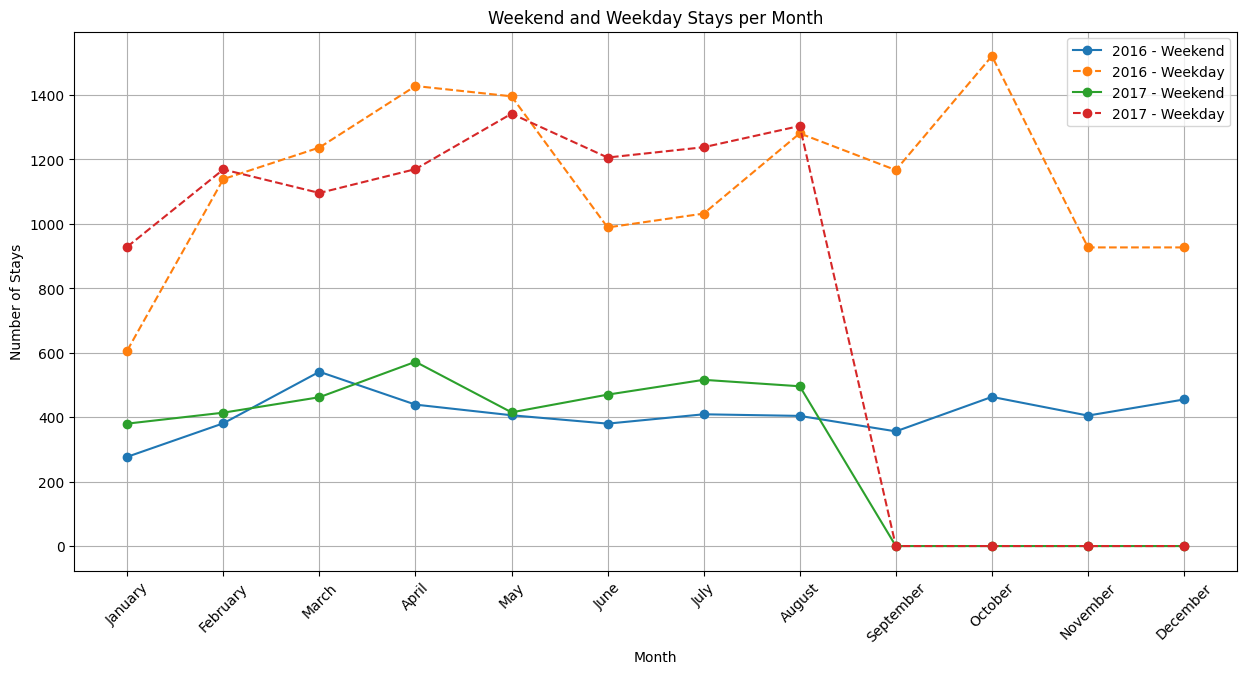

In [10]:
stays_per_month_year = {}
for i in Resort.arrival_date_year.unique():
    if i == 2016 or i == 2017:
        stays_per_month_year[int(i)] = {}
        for j in Resort.arrival_date_month.unique():
            filtered_data = Resort[
                            (Resort['arrival_date_year'] == i) & 
                            (Resort['arrival_date_month'] == j) & 
                            (Resort['reservation_status_day'].isin(['Saturday', 'Sunday']))
                                            ]
            weekend_count = filtered_data.shape[0]

            filtered_data_weekday = Resort[
                            (Resort['arrival_date_year'] == i) & 
                            (Resort['arrival_date_month'] == j) & 
                            (~Resort['reservation_status_day'].isin(['Saturday', 'Sunday']))
                                            ]
            weekday_count = filtered_data_weekday.shape[0]
            stays_per_month_year[i][j] = {
                'weekend': weekend_count,
                'weekday': weekday_count
            }
    
data = []
for year,months in  stays_per_month_year.items():
    for month,count in months.items():
        data.append([year,month,count['weekend'],count['weekday']])
df = pd.DataFrame(data,columns=['Year', 'Month', 'Weekend', 'Weekday'])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df = df.sort_values(['Year', 'Month'])

plt.figure(figsize=(15,7))
for year in df['Year'].unique():
    df_year = df[df['Year'] == year]
    plt.plot(df_year['Month'], df_year['Weekend'], marker='o', label=f'{year} - Weekend')
    plt.plot(df_year['Month'], df_year['Weekday'], marker='o', linestyle='--', label=f'{year} - Weekday')

# Add titles and labels
plt.title('Weekend and Weekday Stays per Month')
plt.xlabel('Month')
plt.ylabel('Number of Stays')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()



# conclusion

## weekday stays generally outnumber weekend stays, especially in 2016. There's a significant increase in weekday stays during the summer months of 2016, followed by a sharp decline after August. In contrast, 2017 shows more consistent weekend stays but a drastic drop in weekday stays after August, potentially indicating an anomaly or external influence. Overall, the data suggests that weekday bookings are typically higher, with noticeable seasonal trends and possible issues in 2017's data after August.

# Frequency of Repeated Guests Across Distribution Channels

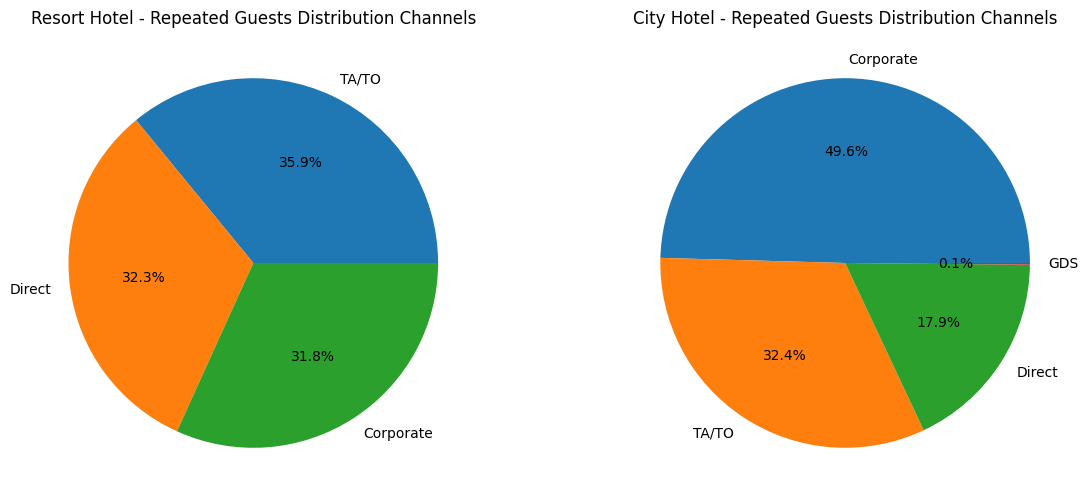

In [111]:
repeated_guest_Resort = Resort[Resort['is_repeated_guest']==1]['distribution_channel'].value_counts()
repeated_guests_city = City[City['is_repeated_guest'] == 1]['distribution_channel'].value_counts()
row,column = plt.subplots(1, 2, figsize=(14, 6))
column[0].pie(repeated_guest_Resort,labels=repeated_guest_Resort.index,autopct='%1.1f%%')
column[1].pie(repeated_guests_city,labels=repeated_guests_city.index,autopct='%1.1f%%')
column[0].set_title('Resort Hotel - Repeated Guests Distribution Channels')
column[1].set_title('City Hotel - Repeated Guests Distribution Channels')
plt.show()

### Resort Hotel: The distribution of repeated guests is fairly balanced across three main channels: TA/TO (35.9%), Direct (32.3%), and Corporate (31.8%).
### City Hotel: The majority of repeated guests book through the Corporate channel (49.6%), with TA/TO (32.4%) and Direct (17.9%) being less common. The GDS channel is almost negligible (0.1%).


# What is the cancellation rate for each hotel by distribution channel.

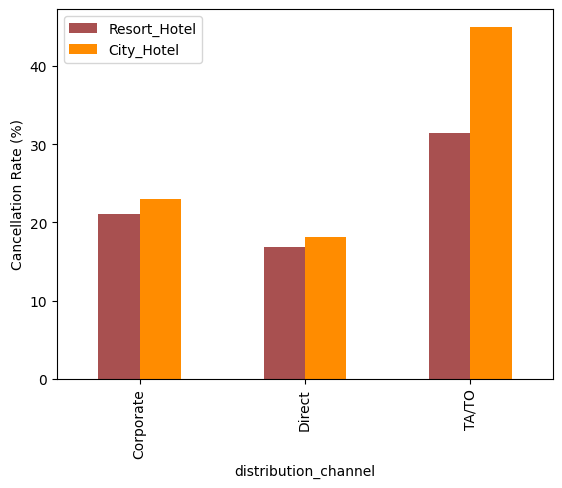

In [53]:
resort_cancellation_rate = Resort.groupby('distribution_channel')['is_canceled'].mean()*100
city_cancellation_rate = City.groupby('distribution_channel')['is_canceled'].mean() * 100
df1 = pd.DataFrame({
    'Resort_Hotel': resort_cancellation_rate,
    'City_Hotel' :  city_cancellation_rate
}).dropna()
df1 = df1[df1['Resort_Hotel']!=0.000]
df1.plot(kind='bar',color=['#A85050', '#FF8C00'])
plt.ylabel('Cancellation Rate (%)')
plt.show()

### City Hotel: Has higher cancellation rates across all distribution channels compared to the Resort Hotel.
### TA/TO Channel: Both hotels show the highest cancellation rates here, but it's more pronounced for the City Hotel.


## Determine the percentage of reservations where the assigned room type was different from the reserved room type.only for 2016,2017 and for top 4 countries.

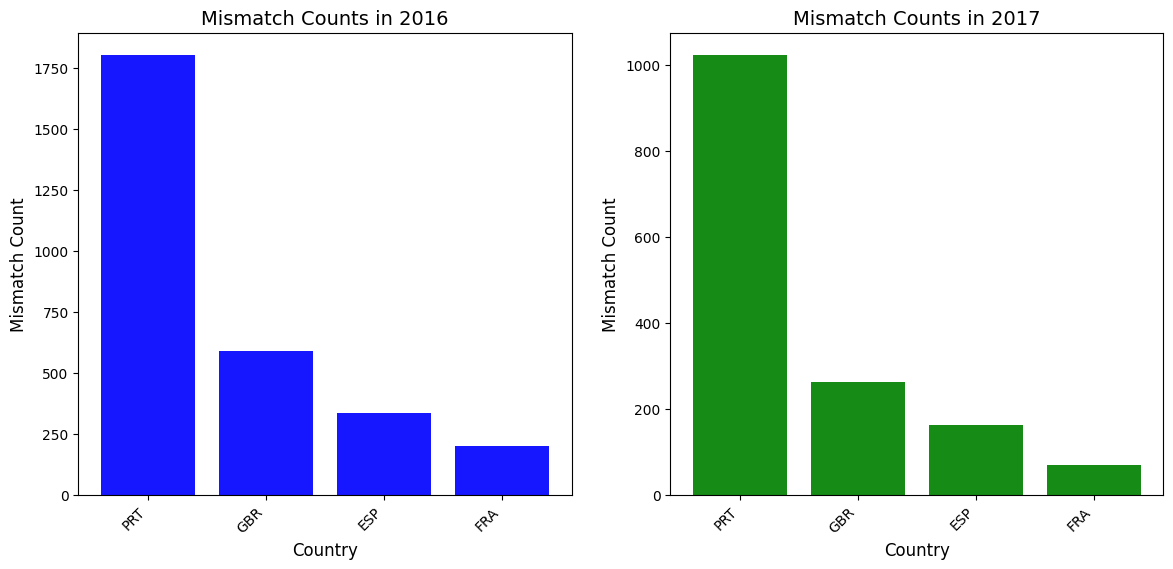

In [114]:
Resort_filtered = Resort[Resort['arrival_date_year'].isin([2016, 2017])]
City_filtered = City[City['arrival_date_year'].isin([2016, 2017])]
# create dataframe for top 4 country where mismatch count is high

def top_country(country_data):
                result = Resort_filtered.groupby(['country','arrival_date_year'])[['reserved_room_type','assigned_room_type']].apply(lambda x:x[x['reserved_room_type'] != x['assigned_room_type']].shape[0])
                result = result.reset_index(name='mismatched_count')
                result = result.sort_values(['arrival_date_year','mismatched_count'],ascending=[True, False])
                result = result.groupby('arrival_date_year').head(5)
                top_5_2016= result[result['arrival_date_year'] == 2016]['country'].head(5)
                top_5_2017 = result[result['arrival_date_year'] == 2017]['country'].head(5)
                common = set(top_5_2016).intersection(top_5_2017)
                filtered_result = result[result['country'].isin(common)]
                return filtered_result
final_result_resort= top_country(Resort_filtered)
final_result_city = top_country(City_filtered)
#plotting
combined = pd.concat([final_result_resort,final_result_city])
plt.figure(figsize=(14, 6))

# Plot for 2016
plt.subplot(1, 2, 1)  # First subplot
data_2016 = combined[combined['arrival_date_year'] == 2016]
plt.bar(data_2016['country'], data_2016['mismatched_count'], alpha=0.7, color='blue')
plt.title('Mismatch Counts in 2016', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Mismatch Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Plot  for 2017
plt.subplot(1, 2, 2) 
data_2017 = combined[combined['arrival_date_year'] == 2017]
plt.bar(data_2017['country'], data_2017['mismatched_count'], alpha=0.7, color='green')
plt.title('Mismatch Counts in 2017', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Mismatch Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.show()

### 2016: Most mismatches occur in Portugal (PRT), with notable counts also in the UK (GBR) and Spain (ESP).
### 2017: Mismatch counts have decreased across all countries, with Portugal still leading, followed by the UK and Spain.

# The Impact of Market Segment on Cancellation Rates for Each Hotel Type

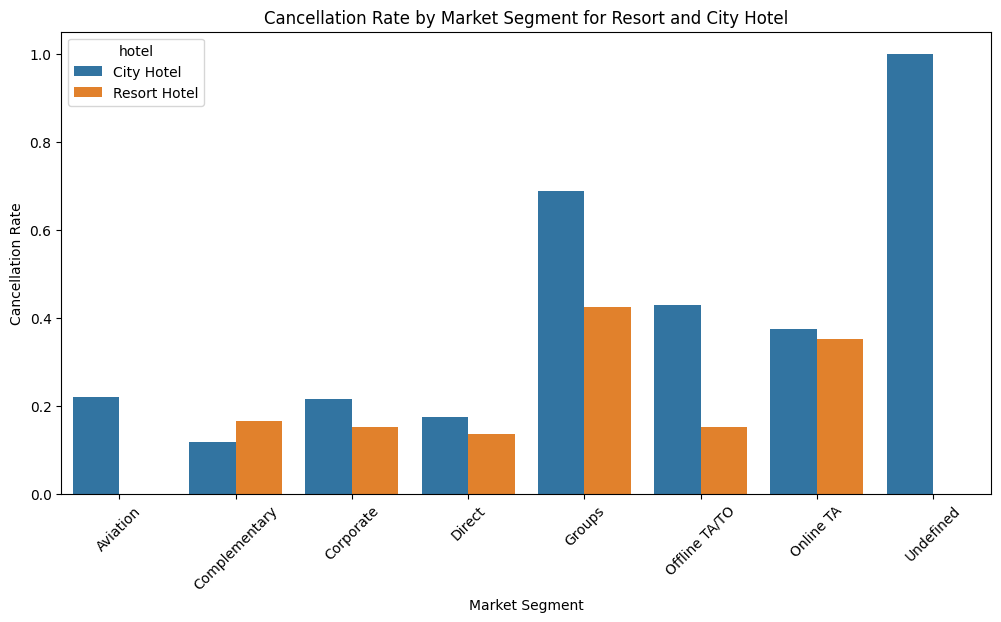

In [18]:

cancellation_analysis = data.groupby(['hotel', 'market_segment'])['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='market_segment', y='is_canceled', hue='hotel', data=cancellation_analysis)
plt.title('Cancellation Rate by Market Segment for Resort and City Hotel')
plt.ylabel('Cancellation Rate')
plt.xlabel('Market Segment')
plt.xticks(rotation=45)
plt.show()


### City Hotel: Shows consistently higher cancellation rates across all market segments compared to the Resort Hotel.
### Groups and Undefined Segments: Have the highest cancellation rates, especially for the City Hotel.

## Investigate whether the duration of stay (weekend nights vs. weekday nights) has any correlation with the likelihood of being a repeated guest in both Resort and City Hotels.
## Compare the average stay duration for repeated and non-repeated guests in both hotel types,

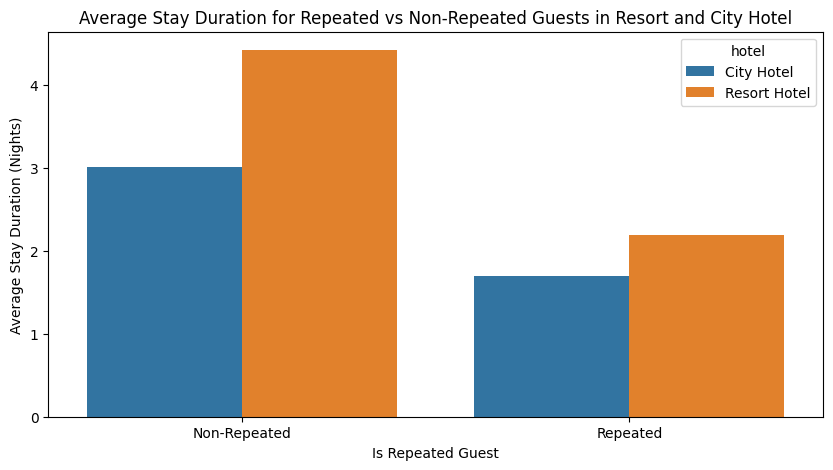

In [19]:
data['total_stay_duration'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

stay_duration_analysis = data.groupby(['hotel', 'is_repeated_guest'])['total_stay_duration'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='is_repeated_guest', y='total_stay_duration', hue='hotel', data=stay_duration_analysis)
plt.title('Average Stay Duration for Repeated vs Non-Repeated Guests in Resort and City Hotel')
plt.ylabel('Average Stay Duration (Nights)')
plt.xlabel('Is Repeated Guest')
plt.xticks([0, 1], ['Non-Repeated', 'Repeated'])
plt.show()


### Resort Hotel: Repeated guests tend to have shorter stays than non-repeated guests.
### City Hotel: Both repeated and non-repeated guests have similar average stay durations, but repeated guests have slightly shorter stays.